In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('loan.csv')
df=df.dropna(axis=1,how='all')
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])

print(numeric_data.shape)
print(categorical_data.shape)


/Users/parisahojjatnia/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2260668, 106)
(2260668, 36)


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
df.plot.scatter(x=['loan_amnt'],y=['annual_inc'])

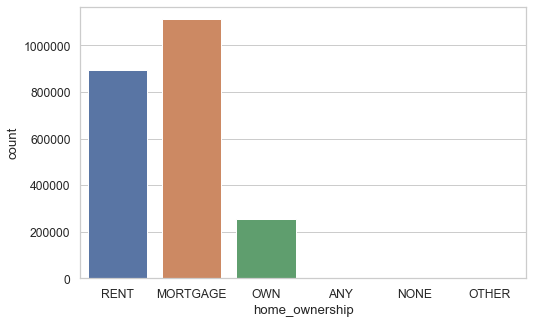

In [10]:
sns.countplot(df['home_ownership']);

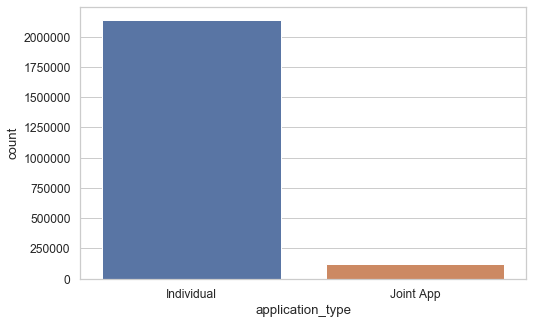

In [11]:
sns.countplot(df['application_type']);

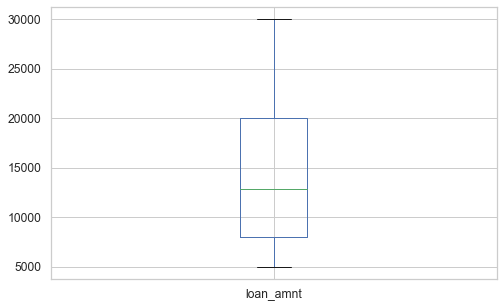

In [15]:
df['loan_amnt'].plot.box()

In [18]:
print(df['purpose'])

0          debt_consolidation
1          debt_consolidation
2          debt_consolidation
3          debt_consolidation
4          debt_consolidation
                  ...        
2260663    debt_consolidation
2260664    debt_consolidation
2260665    debt_consolidation
2260666    debt_consolidation
2260667           credit_card
Name: purpose, Length: 2260668, dtype: object


In [20]:
listn=df['purpose'].unique().tolist()
print(listn)

['debt_consolidation', 'credit_card', 'house', 'car', 'other', 'vacation', 'home_improvement', 'small_business', 'major_purchase', 'medical', 'renewable_energy', 'moving', 'wedding', 'educational']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

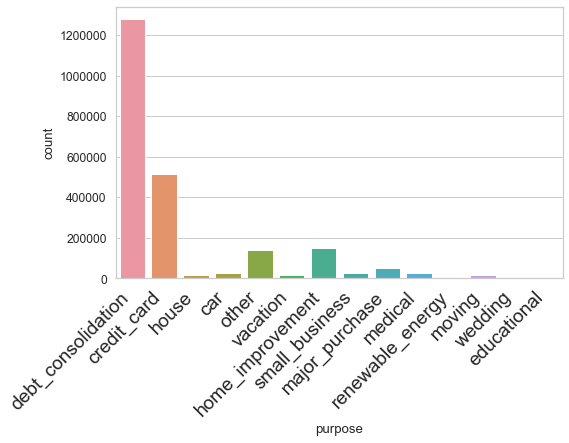

In [21]:
sns.countplot(df.purpose)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

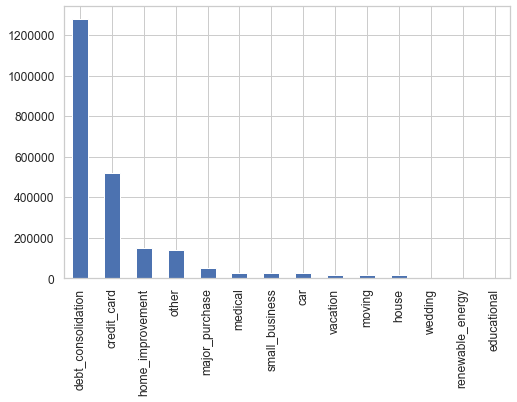

In [22]:
df['purpose'].value_counts().plot(kind='bar')

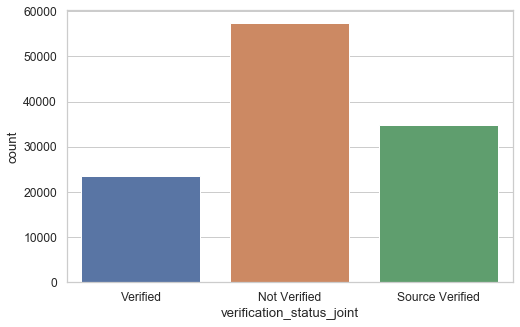

In [61]:
sns.countplot(df.verification_status_joint)


Text(0.5, 1.0, 'Amount Funded by the Lender')

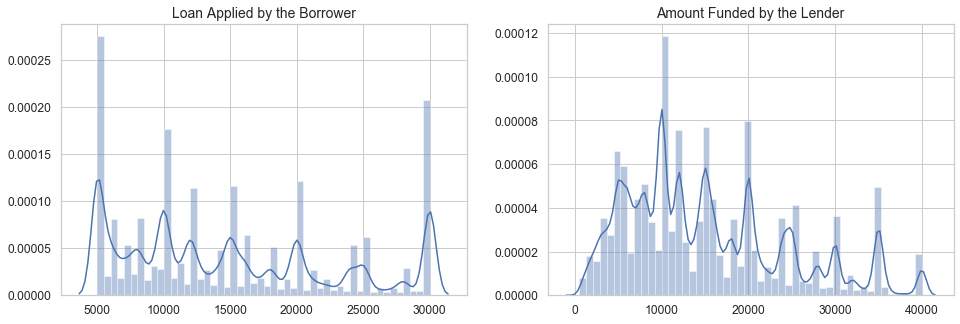

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values


sns.distplot(loan_amount, ax=ax[0])
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1])
ax[1].set_title("Amount Funded by the Lender", fontsize=14)

Mean loan amount is:  14809.203264256406


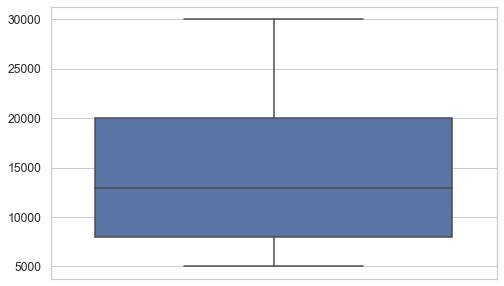

In [36]:
sns.boxplot(y=loan_amount)
print ("Mean loan amount is: ",loan_amount.mean())

Loan Statuses Counts


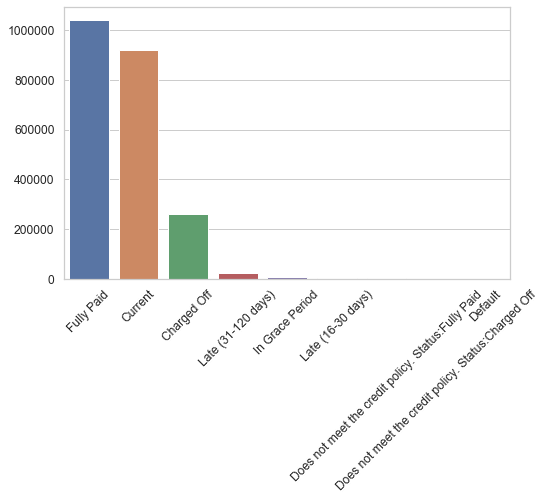

In [37]:
status_counts = df.loan_status.value_counts()
ax = sns.barplot(status_counts.index, status_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Loan Statuses Counts")


In [38]:
status_counts = df.loan_status.value_counts()

In [39]:
status_counts

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

Number of loans issued yearwise


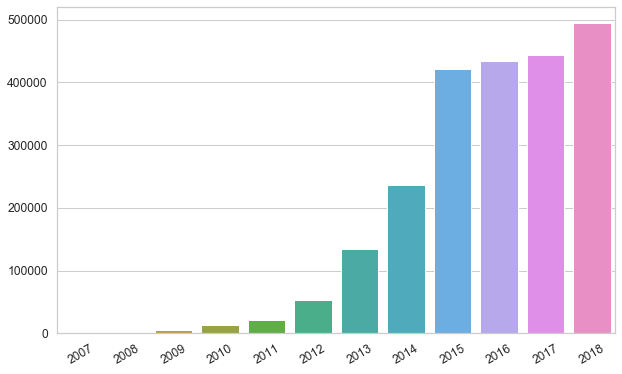

In [40]:
years = pd.to_datetime(df.issue_d)
df["year"] = years.dt.year
yearwise_loans = df.year.value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(yearwise_loans.index, yearwise_loans.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
print("Number of loans issued yearwise")



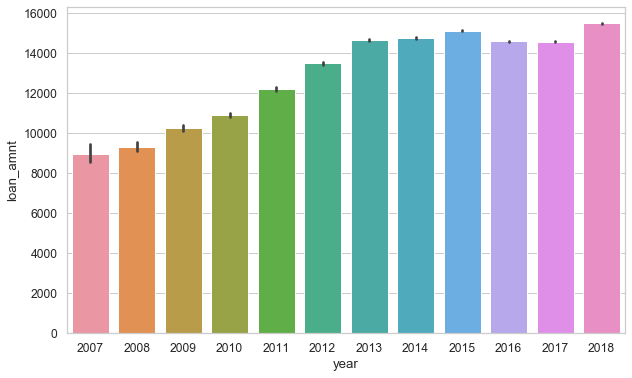

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(df.year, df.loan_amnt)


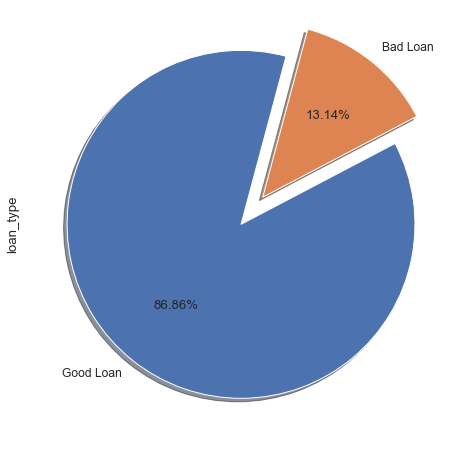

In [42]:
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]
df['loan_type'] = np.nan

def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
df['loan_type'] = df['loan_status'].apply(loan_type)

plt.figure(figsize=(8,8))
df.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75)

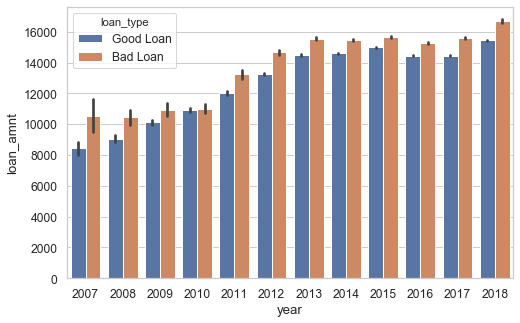

In [43]:
sns.barplot(x=df.year, y=df.loan_amnt, hue=df.loan_type)

<BarContainer object of 51 artists>

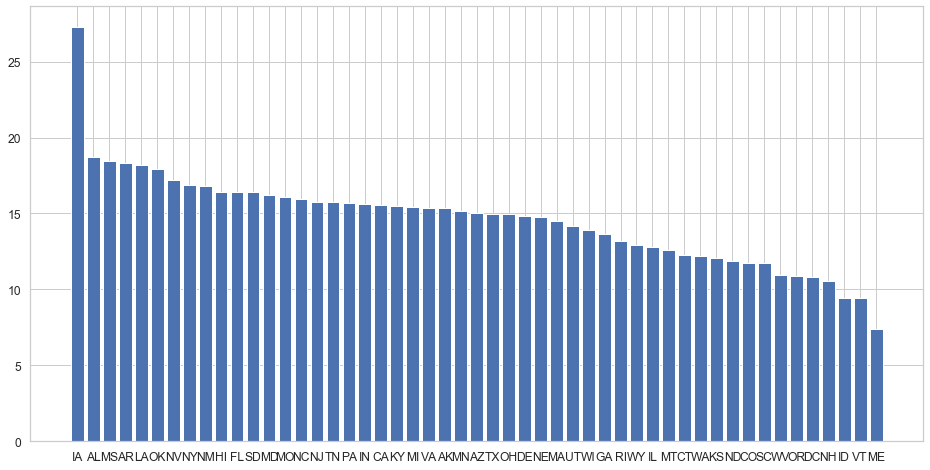

In [44]:
d = {}
for state in df['addr_state'].unique():
    values = df[df['addr_state']==state].loan_type.value_counts()
    d[state] = round(float(values[1])/float(values[0])*100,2)
    
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True) 
x, y = zip(*sorted_d) 

plt.figure(figsize=(16,8))
plt.bar(x,y)


LOANS ISSUED, GROUPED BY CREDIT SCORE


<Figure size 1440x504 with 0 Axes>

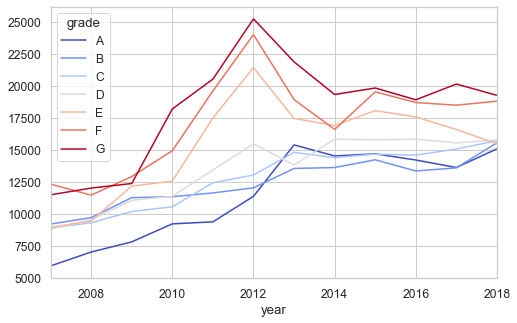

In [45]:
cmap = plt.cm.coolwarm
plt.figure(figsize=(20,7))

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(colormap=cmap)
print("LOANS ISSUED, GROUPED BY CREDIT SCORE")

INTEREST RATES GROUPED BY CREDIT SCORE


<Figure size 1440x720 with 0 Axes>

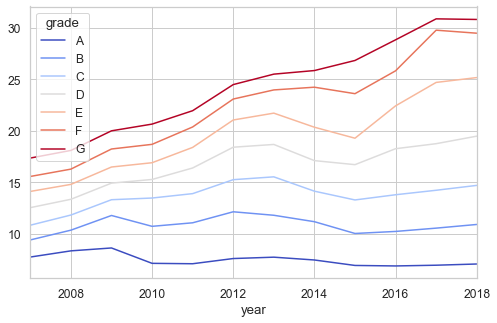

In [46]:
plt.figure(figsize=(20,10))
cmap = plt.cm.coolwarm

by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(colormap=cmap)
print("INTEREST RATES GROUPED BY CREDIT SCORE")

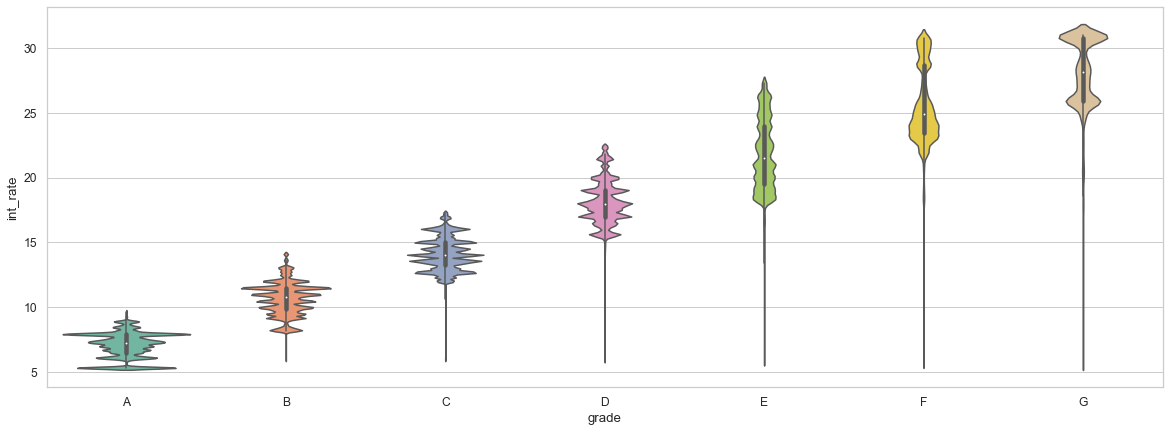

In [47]:
plt.figure(figsize=(20,7))
sns.violinplot(x='grade', y='int_rate', data=df, palette = "Set2", order=['A','B','C','D','E','F','G'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

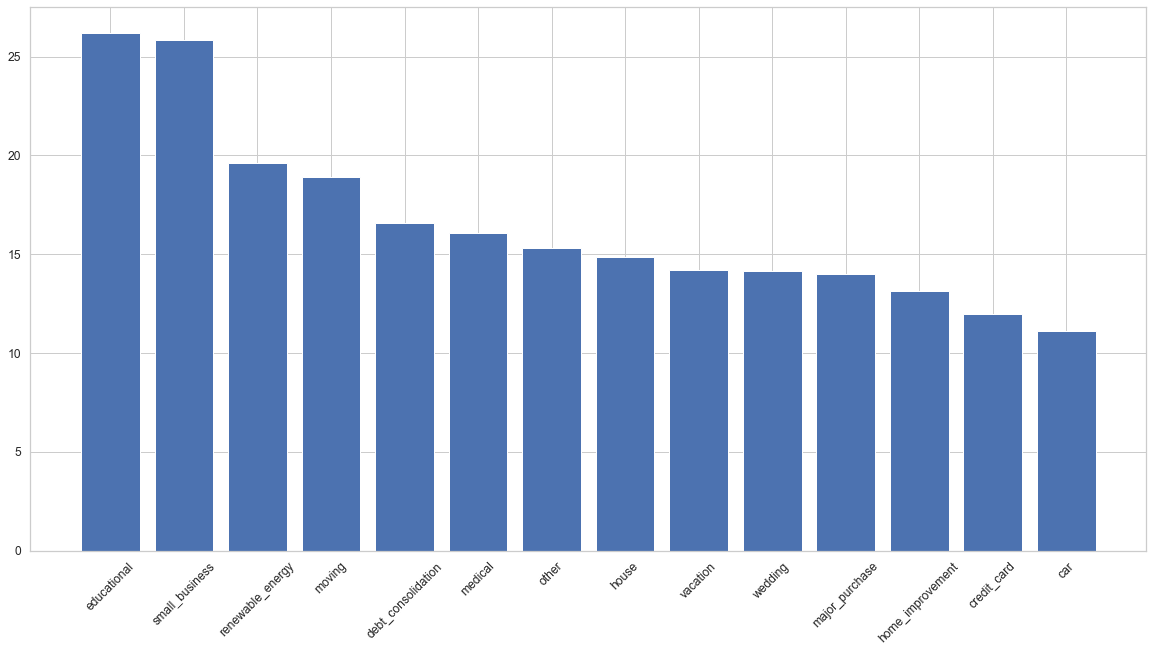

In [48]:
d = {}
for purpose in df.purpose.unique():
    values = df[df['purpose']==purpose].loan_type.value_counts()
    d[purpose] = round(float(values[1])/float(values[0])*100,2)

import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True) 
x, y = zip(*sorted_d)
plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xticks(rotation=45)

In [49]:
df.grade.unique()


array(['C', 'D', 'B', 'A', 'E', 'F', 'G'], dtype=object)

In [50]:
df.sub_grade.unique()

array(['C1', 'D2', 'D1', 'C4', 'C3', 'C2', 'D5', 'B3', 'A4', 'B5', 'C5',
       'D4', 'E1', 'E4', 'B4', 'D3', 'A1', 'E5', 'B2', 'B1', 'A5', 'F5',
       'A3', 'E3', 'A2', 'E2', 'F4', 'G1', 'G2', 'F1', 'F2', 'F3', 'G4',
       'G3', 'G5'], dtype=object)

In [63]:
df.emp_title


0                    Chef
1             Postmaster 
2          Administrative
3           IT Supervisor
4                Mechanic
                ...      
2260663      house keeper
2260664     Skilled Labor
2260665           Teacher
2260666               NaN
2260667        BABYSITTER
Name: emp_title, Length: 2260668, dtype: object

Text(0.5, 1, 'Heatmap of Correlation Matrix')

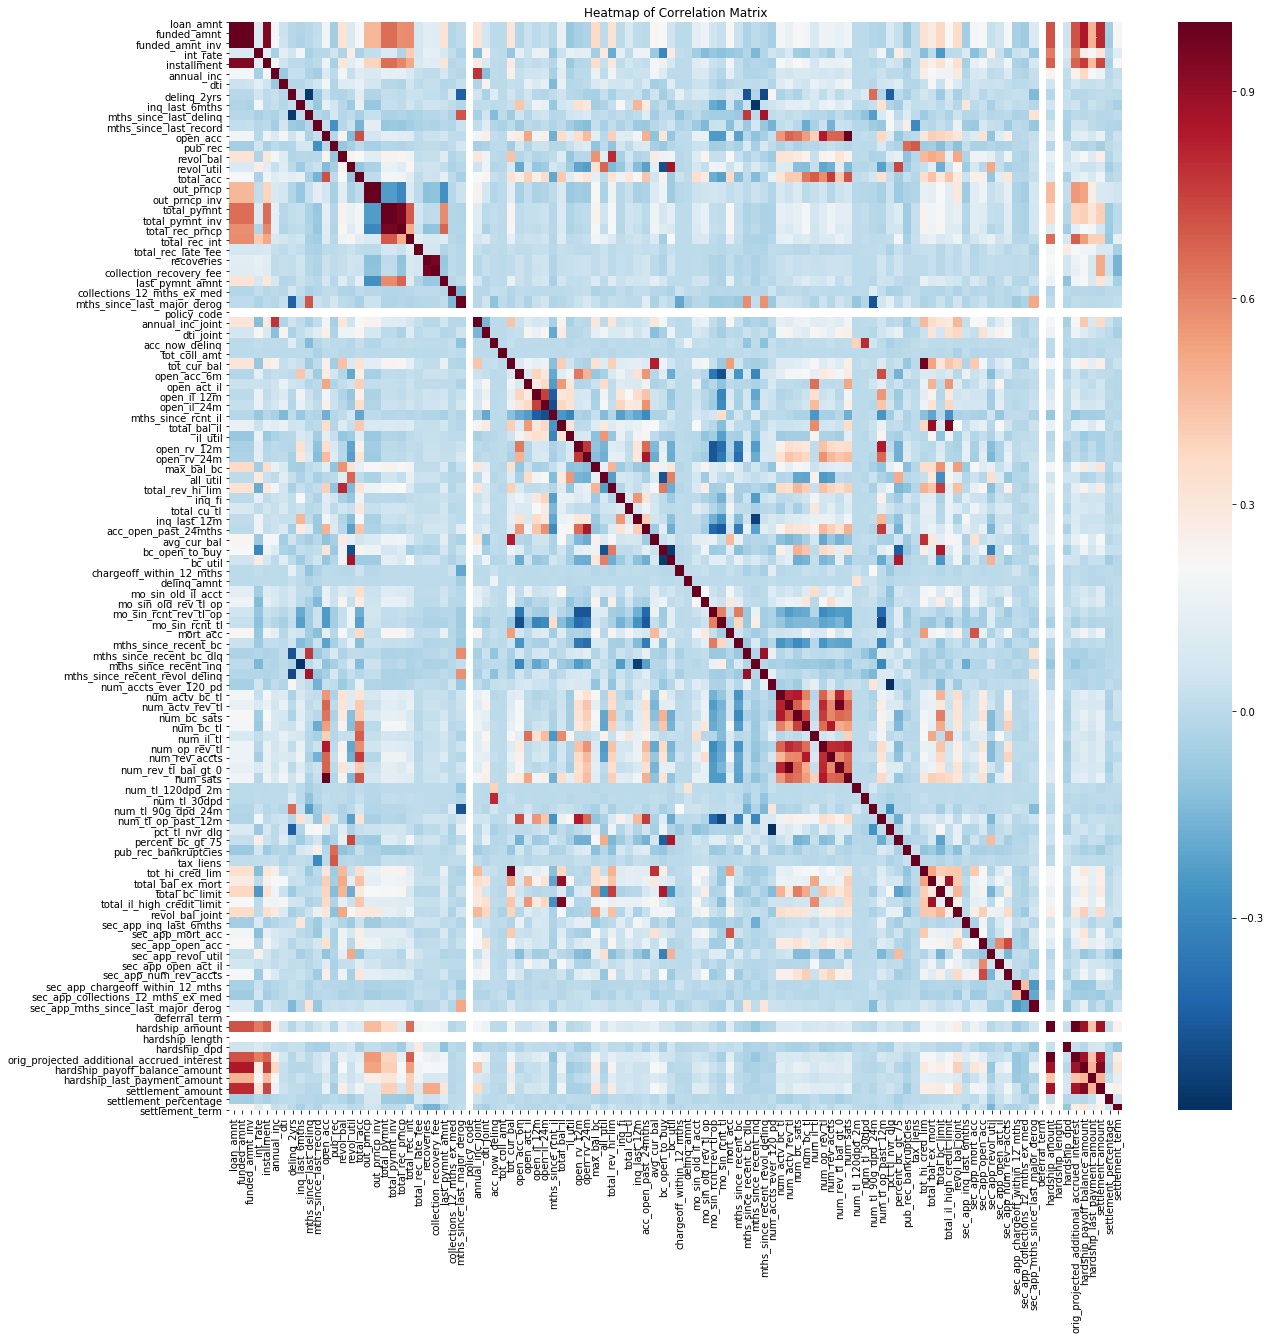

In [16]:
df2 = df.select_dtypes(include=[np.number])

plt.rcParams['figure.figsize'] = (20,20)
corr=df2.corr()
corr = (corr)
sns.set_palette("RdBu_r")
sns.heatmap(corr, cbar = True, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="RdBu_r").set_title('Heatmap of Correlation Matrix')